# Adaptive Cruise Control
Home Assignment for Cyber-Physical Systems (VIMIMA02)

## Introduction

Cruise control systems are widely used in the automotive industry to provide a way for the driver to set a certain speed for the vehicle to keep, which reduces the physical and mental stress of the driver, especially on longer journeys. An adaptive cruise control system takes this a step further, by providing a safety mechanism to reduce the speed if it detects another vehicler in front. By providing this feature, drivers can rely on such systems with greater confidence and therefore the mental strain is further reduced. Furthermore, if a driver does not pay enough attention while driving, this mechanism will try and avoid a potential crash. However, as the ACC is designed to make the driver concentrate less, its failure-free operation is a safety-critical goal.

### HLL Testing and Demonstrational Systems

As testing on actual cars is both cost-prohibitive and slow, developers of automotive systems often use multiple levels of testing and evaluation, slowly making their way towards a fully-fledged system. Software-based testing is out of the scope of this assignment (although definitely necessary), instead I concentrate on hardware-based evaluation, in two steps:

1. A hardware-in-the-loop (HLL) system that provides an abstraction over the physical world, but uses actual target hardware in the system. Some components are simulated in software, and some are instantiated in the physical world. HLL testing is used mainly to evaluate non-functional requirements, as functional requirement are usually fulfilled after the software verification phase. This step resembles integration testing.

2. A demonstrational system that uses all-physical components, but uses an abstract view of the environment. This is useful to evaluate the final system on its own, before being assembled as part of the final product. In this step, we do not expect to find any discrepancies between the specification and the product, as earlier stages should have taken care of them. This step resembles system testing. 


## Goals of the Assignment
In the context of this assignment, my goal is to plan and create an ACC system. My top-level goals are:
* Provide an exhaustive, SysMLv2-based system plan of a fully functional ACC
* Provide an allocation to (and the corresponding implementation of) an HLL testing platform for the ACC
* Provide an allocation to (and the corresponding implementation of) a demonstrational system for the ACC

## Customer Requirements

These requirements capture the intentions of the customer, without any implementation-specific details.

In [1]:
// Note: <<derive>> relationships (RQT 1.3.4) are not yet supported. Where appropriate, a general <<depends>> relationships is used instead.

package CustomerRequirements {
    package FunctionalRequirements {
        requirement def <'F1'> KeepSpeed{
            doc /* The ACC shall be able to keep the current speed when switched on and no obstacles are detected. */
            requirement def <'F1.1'> SwitchOn {
                doc /* The driver shall be able to switch on the ACC */
            }
            requirement def <'F1.2'> DetectObstacles {
                doc /* The ACC shall be able to detect obstacles in the vehicle's path. */
            }
            requirement def <'F1.3'> MeasureSpeed {
                doc /* The ACC shall be able to determine the current traveling speed of the vehicle */
            }
            requirement def <'F1.4'> ModifyTorque {
                doc /* The ACC shall be able to modify the torque expressed by the vehicle's engine */
            }
            requirement def <'F1.5'> OperateBrakes {
                doc /* The ACC shall be able to operate the brakes of the vehicle */
            }
        }
        requirement def <'F2'> SetSpeed{
            doc /* The ACC shall be able to adjust the speed of the vehicle to match a desired speed when no obstacles are detected. */
            dependency from SetSpeed to KeepSpeed::DetectObstacles;
            dependency from SetSpeed to KeepSpeed::ModifyTorque;
            dependency from SetSpeed to KeepSpeed::OperateBrakes;
            requirement def <'F2.1'> ManualInput {
                doc /* The driver shall be able to manually set the desired speed */
            }
        }
        requirement def <'F3'> AdaptSpeed{
            doc /* The ACC shall be able to reduce the speed of the vehicle when operational and an obstacle is detected. */
            dependency from AdaptSpeed to KeepSpeed::DetectObstacles;
            dependency from SetSpeed to KeepSpeed::ModifyTorque;
            dependency from SetSpeed to KeepSpeed::OperateBrakes;
        }
        requirement def <'F4'> SwitchOff{
            doc /* The driver shall be able to switch off the ACC at will */
        }
    }
    package UsabilityRequirements {
        requirement def <'U1'> DriverFeedback {
            doc /* The ACC shall display a status message of the current operation on the instrument panel of the vehicle */
        }
        requirement def <'U2'> SwitchOnOff {
            doc /* The driver shall be able to switch on and off the ACC using a dedicated button. */
            dependency Use from SwitchOnOff to FunctionalRequirements::KeepSpeed::SwitchOn;
            dependency from SwitchOnOff to FunctionalRequirements::SwitchOff;
        }
        requirement def <'U3'> SpeedInput {
            doc /* The driver shall be able to set the desired speed of the vehicle using a dedicated input peripheral. */
            requirement def <'U3.1'> InputResponsiveness {
                doc /* The driver feedback display shall show the input modification within 0.1s. */
                dependency from InputResponsiveness to DriverFeedback;
            }
        }
    }
    package ReliabilityRequirements {
        requirement def <'R1'> LowDowntime {
            doc /* The ACC shall be available in at least 99.99% of the first 5 years of the vehicle's operational lifetime. */  
        }
        requirement def <'R2'> SpeedAccuracy {
            doc /* The ACC shall keep the speed of the vehicle within a single digit of the desired speed */ 
            comment /* The desired speed does not necessarily mean the speed set by the driver, it can also mean the speed calculated by the ACC in case of a detected obstacle */ 
        }
    }
    package PerformanceRequirements {
        requirement def <'P1'> InputResponsiveness {
            doc /* The ACC shall respond to a change on any of its inputs in less than 100ms. */
        }
        requirement def <'P2'> NoDoS {
            doc /* The system shall ratelimit manual input in order to prevent accidental denial-of-service (DoS). */
        }
    }
    package SafetyRequirements {
        requirement def <'Sa1'> NoDangerousFailure {
            doc /* The ACC shall experience maximum as many dangerous failures as specified by the ASIL-C specification for continuous operation. */
            requirement def <'Sa1.2'> FaultTolerance {
                doc /* The system shall be able to detect and mitigate certain faults of its subsystems */ 
            } 
        }
        requirement def <'Sa2'> ManualIntervention {
            doc /* The driver shall be able to intervene in the ACC's operation at will by disengaging it. */
        }
    }
    package SecurityRequirements {
        requirement def <'Se1'> NoOutsideIntervention {
            doc /* The system shall only receive commands from the physical console of the vehicle. */ 
        }
        requirement def <'Se2'> SignedOTA {
            doc /* The system shall only update its sofware if the incoming software update is digitally signed by the original manufacturer. */
        }
    }
    package SupportabilityRequirements{
        requirement def <'Su1'> Telemetry {
            doc /* The system should be able to send detailed logs to an outside service. */
            requirement def <'Su1.1'> DataLogging {
                doc /* The system shall keep logs of every communication among its components as well as the environemnt for up to 1 day. */ 
            }
        }
    }
}

Package CustomerRequirements (8722658a-ad1b-4832-b657-40e297cf7da9)


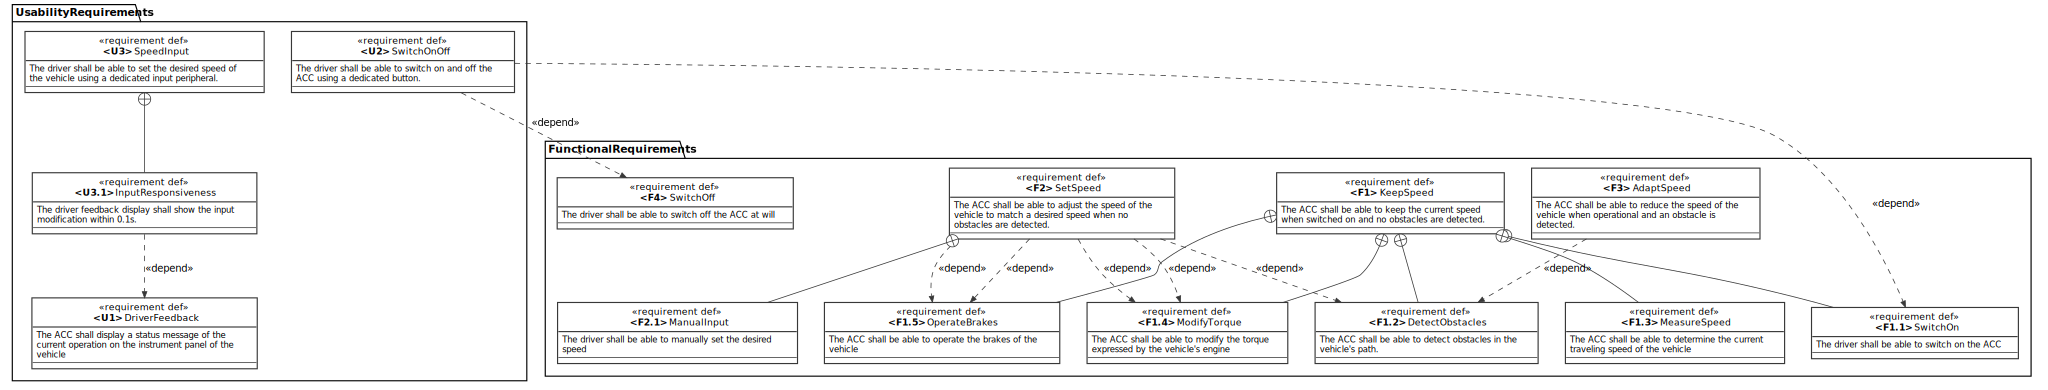

In [2]:
%viz CustomerRequirements::UsabilityRequirements CustomerRequirements::FunctionalRequirements

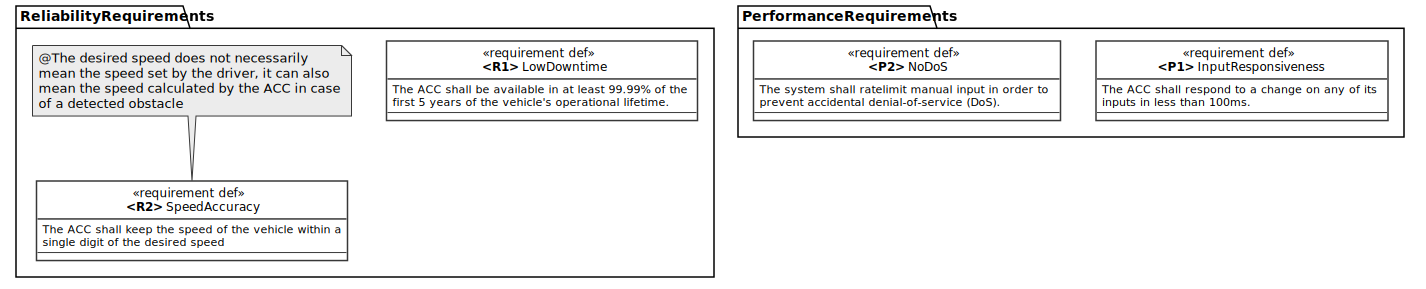

In [3]:
%viz CustomerRequirements::ReliabilityRequirements CustomerRequirements::PerformanceRequirements

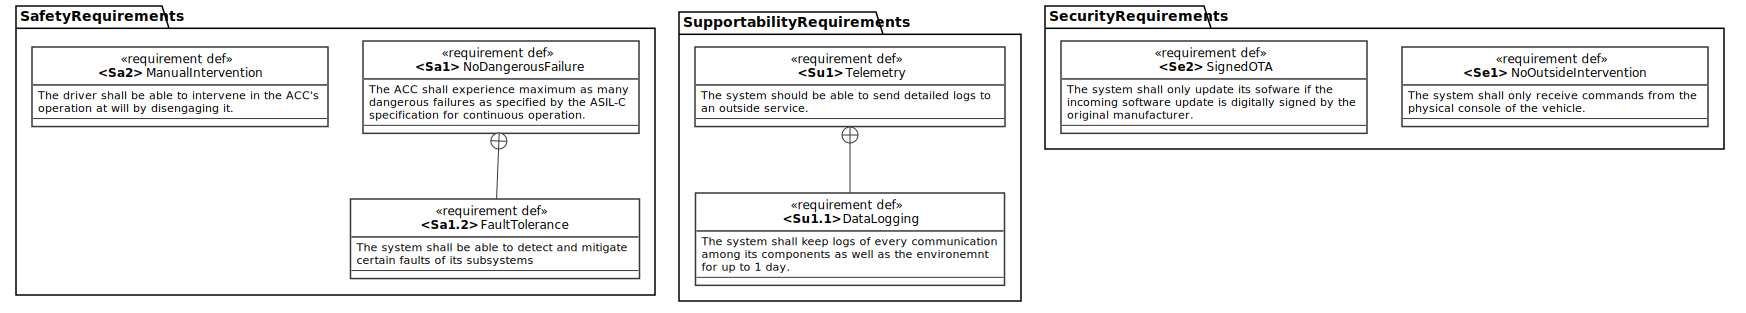

In [4]:
%viz CustomerRequirements::SafetyRequirements CustomerRequirements::SupportabilityRequirements CustomerRequirements::SecurityRequirements

## Top-Level Architecture

This is the top-level architecture of the system based on the requirements above. Note that first, an abstract part definition is created as to provide a way to create multiple instantiations later -- the first of which is the simple top level architecture view.

In [5]:
part def ACC {
    part def HMI { 
        part def OnOffSwitch;
        part def ManualSpeedInput;
    }
    part def Sensors {
        part def SpeedSensor;
        part def ObstacleSensor;
    }
    part def ActuatorArray {
        part def TorqueActuator;
        part def BrakeActuator;
    }
    part def CentralLogicController {
        part def TelemetryController;
        part def BehaviorController;
    }
    
    connection def ManualInputConnection {
        end: HMI[1];
        end: CentralLogicController[1];         
    }
    connection def InputConnection {
        end: Sensors[1];
        end: CentralLogicController[1];
    }
    connection def OutputConnection {
        end: ActuatorArray[1];
        end: CentralLogicController[1];
    }  
}
part TopLevelArchitecture {
    part HMI { 
        part OnOffSwitch;
        part ManualSpeedInput;
    }
    part Sensors {
        part SpeedSensor;
        part ObstacleSensor;
    }
    part ActuatorArray {
        part TorqueActuator;
        part BrakeActuator;
    }
    part CentralLogicController {
        part TelemetryController;
        part BehaviorController;
    }
    connection: ACC::ManualInputConnection connect HMI to CentralLogicController;
    connection: ACC::InputConnection connect Sensors to CentralLogicController;
    connection: ACC::OutputConnection connect ActuatorArray to CentralLogicController;
}

PartDefinition ACC (9aa3c5ef-6d7e-4e42-b873-06a100ed062e)
PartUsage TopLevelArchitecture (b163272a-0b04-461a-8663-d871604abd6a)


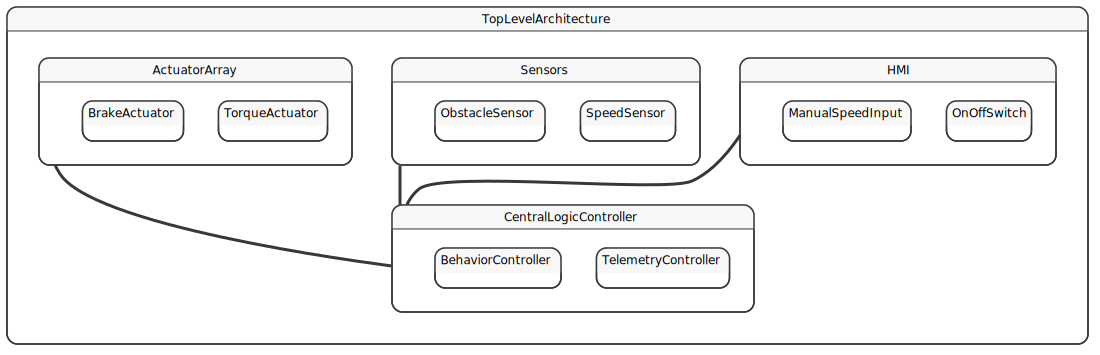

In [6]:
%viz --view=interconnection TopLevelArchitecture